In [7]:
from coffea.util import load
import os
import awkward as ak
import numpy as np
import matplotlib.pyplot as plt
import mplhep as hep
import matplotlib
from coffea.nanoevents import NanoEventsFactory, NanoAODSchema
from coffea import hist, processor
from pocket_coffea.parameters import defaults

from hist import Hist

import sys


matplotlib.rcParams["figure.dpi"] = 300


In [8]:
input = "/work/mmalucch/out_vbfhh4b/out_test/output_all.coffea"
o = load(f"{input}")

In [9]:
o

{'sum_genweights': {'VBFHHto4B_CV_1_C2V_1_C3_1_2022_postEE': 3460727.0},
 'sum_signOf_genweights': {'VBFHHto4B_CV_1_C2V_1_C3_1_2022_postEE': 3460727.0},
 'sumw': {'4b_region': {'VBFHHto4B_CV_1_C2V_1_C3_1_2022_postEE': {'VBF_HHto4B': 2.146308357172368}}},
 'sumw2': {'4b_region': {'VBFHHto4B_CV_1_C2V_1_C3_1_2022_postEE': {'VBF_HHto4B': 3.152813981102135e-05}}},
 'cutflow': {'initial': {'VBFHHto4B_CV_1_C2V_1_C3_1_2022_postEE': 3460727},
  'skim': {'VBFHHto4B_CV_1_C2V_1_C3_1_2022_postEE': 761360},
  'presel': {'VBFHHto4B_CV_1_C2V_1_C3_1_2022_postEE': 536318},
  '4b_region': {'VBFHHto4B_CV_1_C2V_1_C3_1_2022_postEE': {'VBF_HHto4B': 146112}}},
 'variables': {'nJetGood': defaultdict(dict,
              {'VBF_HHto4B': {'VBFHHto4B_CV_1_C2V_1_C3_1_2022_postEE': Hist(
                  StrCategory(['4b_region'], name='cat', label='Category'),
                  StrCategory(['nominal'], name='variation', label='Variation'),
                  Regular(10, 0, 10, name='events.nJetGood', label='$N_{JetG

In [10]:

col = o["columns"]["VBF_HHto4B"][
    "VBFHHto4B_CV_1_C2V_1_C3_1_2022_postEE"
]["4b_region"]
print(o["cutflow"])
for k in col.keys():
    print(type(col[k]))
    col[k] = col[k].value #[col[k].value != -999]

{'initial': {'VBFHHto4B_CV_1_C2V_1_C3_1_2022_postEE': 3460727}, 'skim': {'VBFHHto4B_CV_1_C2V_1_C3_1_2022_postEE': 761360}, 'presel': {'VBFHHto4B_CV_1_C2V_1_C3_1_2022_postEE': 536318}, '4b_region': {'VBFHHto4B_CV_1_C2V_1_C3_1_2022_postEE': {'VBF_HHto4B': 146112}}}
<class 'coffea.processor.accumulator.column_accumulator'>
<class 'coffea.processor.accumulator.column_accumulator'>
<class 'coffea.processor.accumulator.column_accumulator'>
<class 'coffea.processor.accumulator.column_accumulator'>
<class 'coffea.processor.accumulator.column_accumulator'>
<class 'coffea.processor.accumulator.column_accumulator'>
<class 'coffea.processor.accumulator.column_accumulator'>
<class 'coffea.processor.accumulator.column_accumulator'>


In [13]:
print(col.keys())
for k in col.keys():
    print(k, type(col[k]))


dict_keys(['weight', 'JetGood_N', 'JetGood_pt', 'JetGood_eta', 'JetGood_phi', 'JetGood_mass', 'JetGood_btagPNetB', 'JetGood_hadronFlavour'])
weight <class 'numpy.ndarray'>
JetGood_N <class 'numpy.ndarray'>
JetGood_pt <class 'numpy.ndarray'>
JetGood_eta <class 'numpy.ndarray'>
JetGood_phi <class 'numpy.ndarray'>
JetGood_mass <class 'numpy.ndarray'>
JetGood_btagPNetB <class 'numpy.ndarray'>
JetGood_hadronFlavour <class 'numpy.ndarray'>


1) bQuark -> all b-quark (4 quark per event)
2) bQuark matched -> b-quark matched with jet-good (4quark/events), when there’s no matching a padding is present in the array
3) bQuark matched Higgs ->  b-quark matched with jet-good Higgs
4) Jet good -> all jets passing pre-selection (irregular array of at least for jets per event since we require N_jet_good>=4 in the event preselection)
5) Jet good Higgs -> similar as 4) but only 4 leading jets in b-tag (i.e. as in the analysis selection)
6) Jet good matched -> similar as 4) but with parton matching switched on ( when there’s no matching a padding is present in the array)
7) Jet good matched Higgs -> similar as 6) but only 4 leading jets in b-tag  (i.e. as in the analysis selection)

In [16]:

jet_good_matched_provenance_unflat = ak.unflatten(
    col["JetGood_pt"], col["JetGood_N"]
)

print(jet_good_matched_provenance_unflat)

[[90.1, 67, 50.4, 84.2, 38.5], [136, 39.6, ... 64.2], [146, 62, 56.8, 146, 47.5]]


In [8]:
print(ak.sum(col["JetGoodHiggsMatched_N"]))
print(ak.sum(col["JetGoodMatched_N"]))
print(ak.sum(col["JetGood_N"]))
print((col["JetGoodMatched_provenance"][:6]))

24524
29424
29424
[   1.    2.    1.    2. -999.    1.]


[[1, 2, 1, 2, -999], [1, 2, 2, 1], ... -999, -999], [1, 2, -999, 2, 1, -999, -999]]
3345
0.056203288490284005
0.030663839504159192
[[1, -999, 2, 1, 2, -999], [1, 2, 2, ... -999, -999], [1, 2, -999, 2, 1, -999, -999]]
[[1, -999, 0.854, 0.81, 0.441, -999], ... 1, 0.976, -999, 0.887, 0.859, -999, -999]]
percentage 0.01565813081063448
[[1, 0.917, 0.854, 0.81, 0.441, 0.00462, ... 0.909, 0.887, 0.859, 0.0679, 0.0151]]
[0.441, 0.25, 0.363, 0.249, 0.84, 0.129, ... 0.145, 0.384, 0.238, 0.807, 0.859]


<Array [[1, 0.99, 0.857, ... -999, -999]] type='6131 * var * float64'>

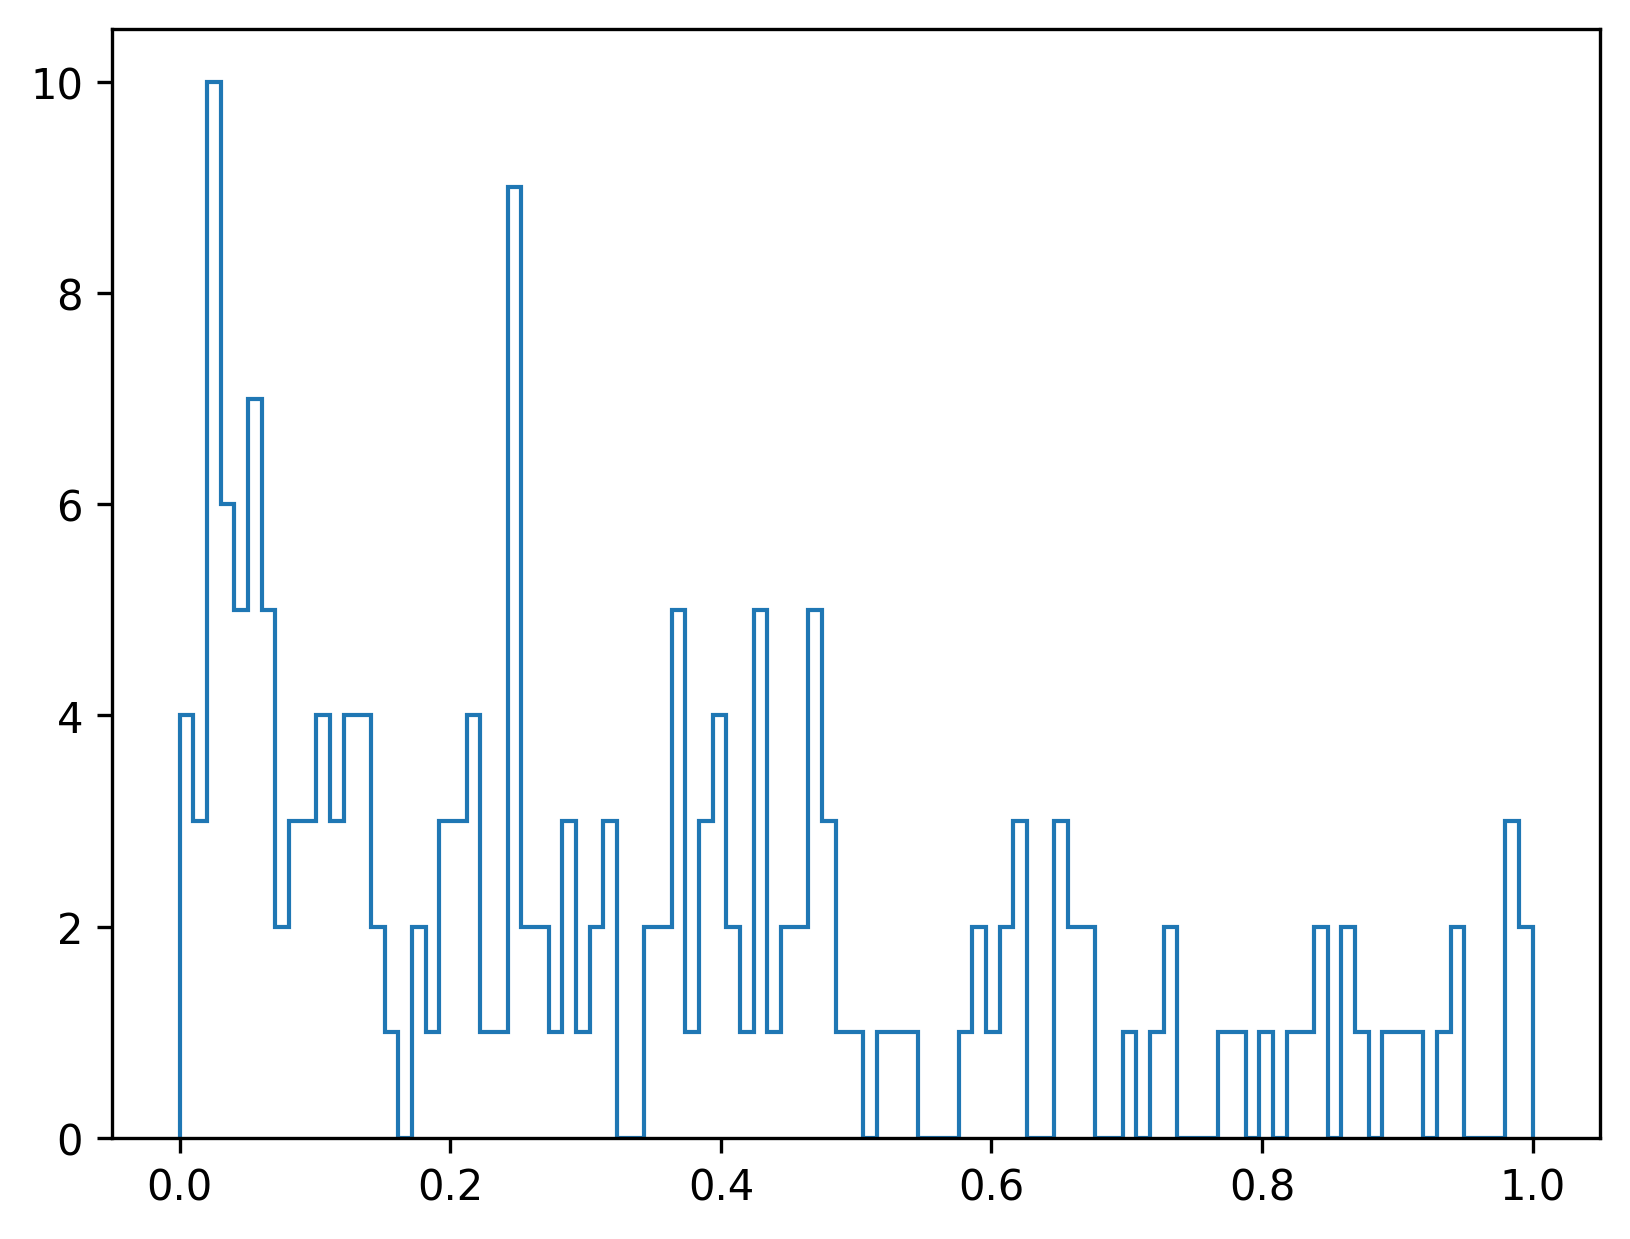

In [9]:
jet_good_matched_provenance_unflat = ak.unflatten(
    col["JetGoodMatched_provenance"], col["JetGoodMatched_N"]
)


print(jet_good_matched_provenance_unflat)
five_jets = col["JetGoodMatched_N"]>=5
print(ak.sum(five_jets))
mask_5_matched =jet_good_matched_provenance_unflat[five_jets][:,4] != -999.
mask_5_matched_btag=jet_good_matched_provenance_unflat
print(ak.sum(mask_5_matched)/ak.sum(five_jets))
print(ak.sum(mask_5_matched)/len(col["JetGoodMatched_N"]))
print(jet_good_matched_provenance_unflat[five_jets][mask_5_matched])


jet_good_matched_btag_unflat=ak.unflatten(col["JetGoodMatched_btagPNetB"], col["JetGoodMatched_N"])
jet_good_btag_unflat=ak.unflatten(col["JetGood_btagPNetB"], col["JetGoodMatched_N"])
print(jet_good_matched_btag_unflat[five_jets][mask_5_matched])
mask_5jet_btag = jet_good_matched_btag_unflat[five_jets][mask_5_matched][:,4] > 0.2605
print("percentage", ak.sum(mask_5jet_btag)/len(col["JetGoodMatched_N"]))
print(jet_good_btag_unflat[five_jets][mask_5_matched])
plt.hist(jet_good_matched_btag_unflat[five_jets][mask_5_matched][:,4], bins=np.linspace(0,1,100), histtype="step", label="matched")

print(jet_good_matched_btag_unflat[five_jets][mask_5_matched][:,4])
jet_good_matched_btag_unflat

In [10]:
a=ak.Array([[1, None], [1, None]])
print(ak.count(a, axis=1))
print(ak.num(a))

[1, 1]
[2, 2]


In [11]:
print(ak.sum(col["JetGoodMatched_N"]>=5))
print(ak.sum(col["JetGoodMatched_N"]==4))
tot=ak.sum(col["JetGoodMatched_N"]==5)*5+ak.sum(col["JetGoodMatched_N"]==4)*4
print(ak.sum(col["JetGoodMatched_N"]==5)*5/tot)
print(ak.sum(col["JetGoodMatched_N"]==4)*4/tot)

3345
2786
0.4948093748583345
0.5051906251416656
